# Python Linear Regression and Deep Leaning Analysis of COPD Public Health Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns

This is a Data Set from the Global Masters of Public Health through Imperial College London and Coursera

In [2]:
df = pd.read_csv(r"C:\Users\dougl\OneDrive\Desktop\VYLgxg9YEemU7w7-EFnPcg_5645e2700f5811e9b2f4133a1edfbb40_COPD_student_dataset.csv")

Loading the Data Set using pandas

In [3]:
df

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120,120,1.21,36.0,...,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176,176,1.09,56.0,...,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180,201,1.52,68.0,...,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210,210,0.47,14.0,...,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210,210,1.07,42.0,...,75.56,1,3,1,2,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,10,68,25.0,MILD,511.0,575,575,2.70,98.0,...,35.84,2,1,1,2,0,1,0,0,0
97,98,43,75,40.0,MILD,576.0,577,577,2.90,93.0,...,15.05,3,1,1,2,0,1,0,0,1
98,99,74,68,30.0,MODERATE,468.0,582,582,1.65,67.0,...,19.70,2,2,0,2,0,0,1,0,0
99,100,108,54,30.0,SEVERE,688.0,699,699,1.72,44.0,...,20.55,1,3,1,2,0,0,0,0,0


As you can see once install from the data set has 24 Colums and 100 rows of data, and at initial glance you can see that COPDSEVERITY is the categorical text column of copd which is the "dummies", so I will drop the COPDSEVERITY column

In [4]:
df = df.dropna()
df1= df.drop('COPDSEVERITY', axis = 1)
dfglm= df1

In the Data Set you can see three variables MWT1, MWT2, MWT1Best, from the literature that is available for the Data these variable are 2 different fitness test and the best result of the 2 fitness test. So lets drop MWT1 and MWT2 and keep MWT1Best as the main outcome variable for the rest of our testing

In [5]:
y = df1.MWT1Best
df1= df1.drop(['Unnamed: 0', 'MWT1Best', 'MWT1', 'MWT2'], axis=1)
dfglm1= dfglm.drop(['Unnamed: 0', 'MWT1', 'MWT2'], axis=1)
df1.head()

,ID,AGE,PackHistory,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,58,77,60.0,1.21,36.0,2.40,98,25,8.0,69.55,4,3,1,2,1,0,0,1,0
1,57,79,50.0,1.09,56.0,1.64,65,12,21.0,44.24,4,2,0,2,1,0,0,1,1
2,62,80,11.0,1.52,68.0,2.30,86,22,18.0,44.09,4,2,0,2,1,0,0,1,0
3,145,56,60.0,0.47,14.0,1.14,27,28,26.0,62.04,1,4,1,2,0,0,1,1,0
4,136,65,68.0,1.07,42.0,2.91,98,32,18.0,75.56,1,3,1,2,0,1,1,0,0


MWT1Best is the result of 2 fitness walking tests provided to all participants, lets check if this particular variable is sound before we go too much further

In [6]:
y.skew()

-0.27776381607590855

With a skew of just -0.27 this is easily with normal bounds

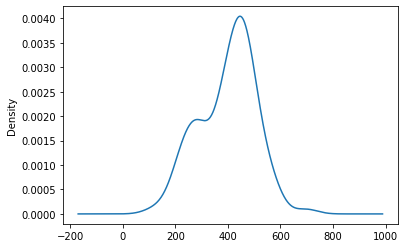

In [7]:
y.plot.density()

Although there is a slight negative skew to the MWT1Best data its within normal bounds of +/-1

In [8]:
age = df.AGE
age.skew()


-0.7498463364622273

Many people consider Age as a variable of interest when evaluating fitness tests and the effects of COPD, once again being within  +/- 1 this variable can be considered normal

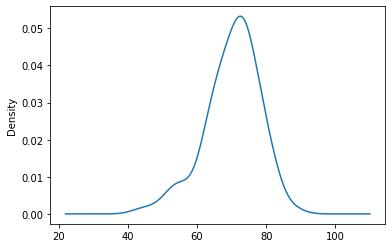

In [9]:
age.plot.density()


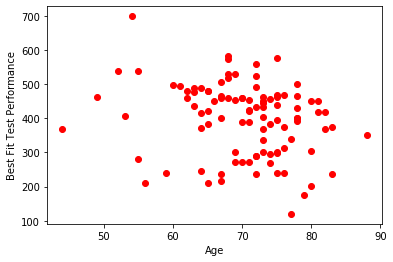

In [10]:
plt.scatter(age, y, c='r')
plt.xlabel('Age')
plt.ylabel('Best Fit Test Performance')
plt.show()

However performing a scatter plot of these two variables you can clearly see a lot of variation, so lets analyse the entire dataset and the coefficients in regards to MWT1Best.

## Exploratory Lasso Regression 

[ -0.          -2.92692088  -0.43769928   0.           0.
  19.39536252  -0.3838877   -0.          -1.02897462  -2.10696803
  -0.         -15.79665489   0.          -0.         -17.23094202
   0.           0.         -82.10405997  30.43677766]


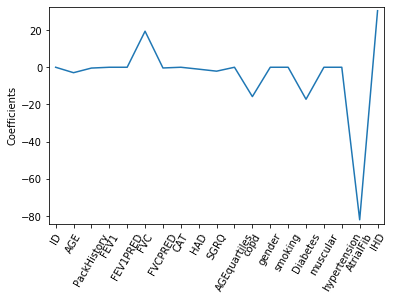

In [11]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha= 0.4, normalize= True)
names =df1.columns
lasso.fit(df1, y)
lasso_coef = lasso.coef_
print(lasso_coef)
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.margins(0.02)
plt.show()

Looking at the Data Set as a whole you can clearly seethere is only 5 significant coefficients of interest so lets clean the data set further and prepare data sets for further testing

In [12]:
df2= df1[["AGE", "Diabetes", "AtrialFib", "IHD", 'gender']]
dfglm2 = dfglm1.drop(['ID', 'FEV1', 'FEV1PRED', 'AGEquartiles', 'CAT', 'HAD', 'copd', 'PackHistory', 'FVCPRED', 'SGRQ', 'smoking', 'muscular', 'hypertension'], axis=1)
dfglm2train = dfglm2[0:60]
dfglm2test = dfglm2[61:100]


For demonstration purposes you can either subset the variables you need or drop the variables you don't need when creating a new data set

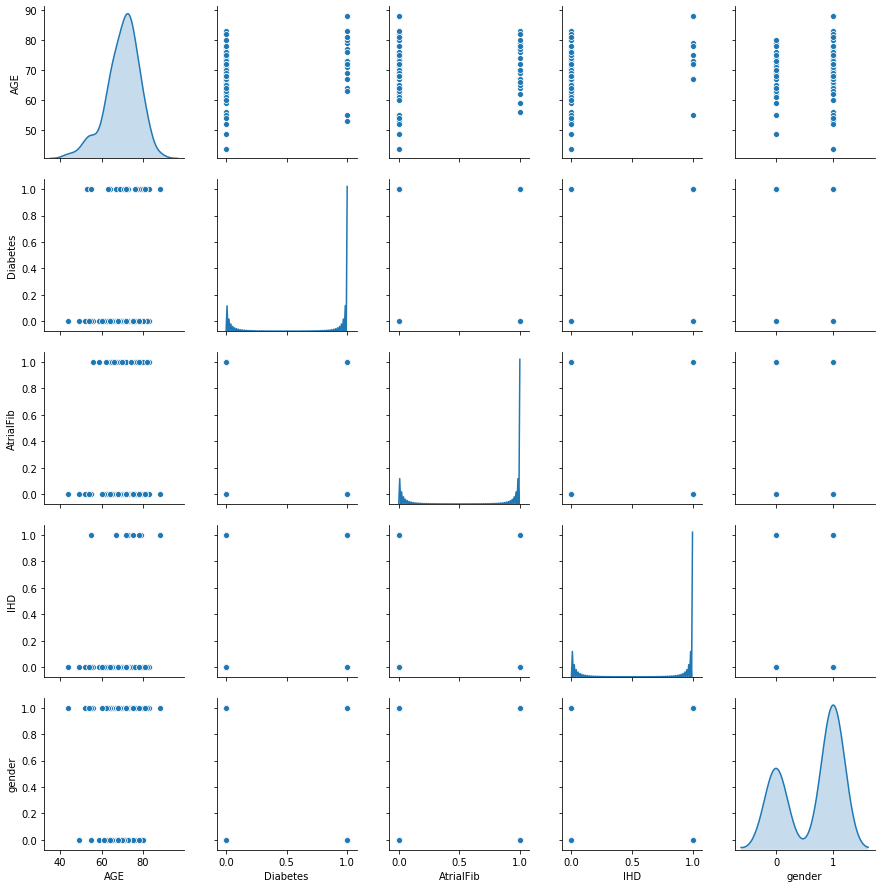

In [13]:
df2.head()
sns.pairplot(df2, diag_kind="kde")

Inspecting the data above you can clearly see a lot of binary variables this potentially might provide an issue when considering linear regression for the normal outcome variable of MWT1Best

## Lasso Regression: with a reduced dataset we are going to perform more regression to see what results we can achieve

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import linear_model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.4, random_state=42)

[ -3.06899008 -73.93487912 -96.18279241  28.3560139   18.62841969]


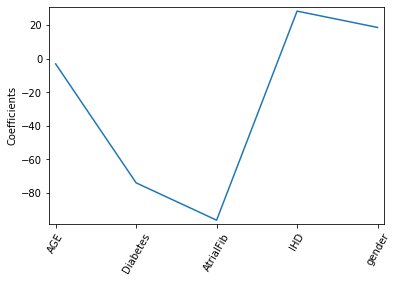

In [16]:
lasso = Lasso(alpha= 0.4, normalize= True)
names =X_train.columns
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_
print(lasso_coef)
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.margins(0.02)
plt.show()

As you can see all variables now have quite a pronouced effect on the outcome variable of the Walking test in Meters (MWT1Best)

In [17]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [18]:
predictions = lm.predict(X_test)

In [19]:
lm.score(X_test,y_test)

0.2368354411577469

With an R^2 score of 0.24, this figure is similar to figures obtained during the Imperial College London R Linear Regression Course Public Health Course which I completed

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, predictions))
rms

92.89936343465062

However, with a Root Mean Square Error of 93 Meters this is far from ideal, and comparing this to Lasso regression just below the results are slightly worse with a Root Mean Squared of 93.5 Meters and an R^2 of 0.22.



In [21]:
lasso = Lasso(alpha= 1.5
            , normalize= True)
modellasso = lasso.fit(X_train, y_train)
predictions = modellasso.predict(X_test)
r2 = modellasso.score(X_test, y_test)
rms = sqrt(mean_squared_error(y_test, predictions))
rms

93.50334535393826

In [22]:
r2

0.22687980825339693

# TensorFlow Linear Regression

This will help resolve whether there is a linear relationship between the various independent and dependent variables

In [23]:
dfglm2train.head()

,AGE,MWT1Best,FVC,gender,Diabetes,AtrialFib,IHD
0,77,120,2.40,1,1,1,0
1,79,176,1.64,0,1,1,1
2,80,201,2.30,0,1,1,0
3,56,210,1.14,1,0,1,0
4,65,210,2.91,1,0,0,0


In [24]:
best = np.array(dfglm2train['MWT1Best'], np.float32)
age= np.array(dfglm2train['AGE'], np.float32)
FVC= np.array(dfglm2train['FVC'], np.float32)
diabetes = np.array(dfglm2train['Diabetes'], np.float32)
atrial= np.array(dfglm2train['AtrialFib'], np.float32)
ihd= np.array(dfglm2train['IHD'], np.float32)


In [25]:
params = tf.Variable([1.5,1.5,1.5,1.5,1.5,1.5,1.5], np.float32)

In [26]:
def linear_regression(params, feature1 = age, feature2 = FVC, feature3 =diabetes, feature4 =atrial, feature5 =ihd):
    return params[0] + feature1*params[1] + feature2*params[2] + feature3*params[3] + feature4*params[4] + feature5*params[5]

In [27]:
def loss_function(params, targets = best, feature1 = age, feature2 = FVC, feature3 =diabetes, feature4 =atrial, feature5 =ihd):
    predictions = linear_regression(params, feature1, feature2, feature3, feature4, feature5)
    return keras.losses.mse(targets, predictions)

In [28]:
opt = tf.keras.optimizers.Adam()

In [29]:
for j in range(2000):
    opt.minimize(lambda: loss_function(params), var_list=[params])

In [30]:
mse = loss_function(params).numpy()

In [31]:
import math
rmse = math.sqrt(mse)
rmse

126.4258714684716

In [32]:
npredictions = np.delete(predictions, [1], None)
r2_score(dfglm2test['MWT1Best'], npredictions)

-4.1013839941857935

There is far more that could be done to tune, a TensorFlow Linear Regression model however with an R^2 of -4.1 this will be abandoned 
as the relationship is likely non linear



#  Deep Neural Networks, TensorFlow and Keras

In [33]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib

In [34]:
dataset = pd.read_csv(r"C:\Users\dougl\OneDrive\Desktop\VYLgxg9YEemU7w7-EFnPcg_5645e2700f5811e9b2f4133a1edfbb40_COPD_student_dataset.csv")

I am reloading the dataset to make sure I have new data, however it also require recleaning

In [35]:
dataset = dataset.dropna()

In [36]:
dataset = dataset[["AGE", "MWT1Best", "Diabetes", "AtrialFib", "IHD", "gender", "muscular", "SGRQ", 'FVCPRED']]

Being developed in C++ Tensorflow is very efficient and able to handle more variables with ease

In [37]:
train_dataset = dataset.sample(frac=0.6,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

The stats of the Target/Dependent Variable

In [38]:
train_dataset['MWT1Best'].describe()

count     60.000000
mean     379.633333
std      105.837254
min      120.000000
25%      297.250000
50%      401.000000
75%      454.500000
max      575.000000
Name: MWT1Best, dtype: float64

In [39]:
test_dataset['MWT1Best'].describe()

count     40.000000
mean     427.375000
std      102.133821
min      240.000000
25%      369.000000
50%      454.000000
75%      489.750000
max      699.000000
Name: MWT1Best, dtype: float64

In [40]:
train_stats = train_dataset.describe()
train_stats.pop("MWT1Best")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
AGE,60.0,70.450000,8.261458,44.00,67.0000,72.000,76.2500,83.00
Diabetes,60.0,0.216667,0.415450,0.00,0.0000,0.000,0.0000,1.00
AtrialFib,60.0,0.250000,0.436667,0.00,0.0000,0.000,0.2500,1.00
IHD,60.0,0.066667,0.251549,0.00,0.0000,0.000,0.0000,1.00
gender,60.0,0.683333,0.469102,0.00,0.0000,1.000,1.0000,1.00
muscular,60.0,0.200000,0.403376,0.00,0.0000,0.000,0.0000,1.00
SGRQ,60.0,43.976333,18.130675,8.25,31.8375,38.655,58.5025,77.44
FVCPRED,60.0,82.433333,19.680815,27.00,70.0000,82.500,98.5000,122.00


Split feature from labels

In [41]:
train_labels = train_dataset.pop('MWT1Best')
test_labels = test_dataset.pop('MWT1Best')

Normalizing the Data for better performance

In [42]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

Building the model using Keras

In [43]:
model = tf.keras.Sequential([
    layers.Dense(512, activation='tanh', input_shape=[len(train_dataset.keys())]),
    layers.Dropout(0.5),
    layers.Dense(512, activation='tanh'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='tanh'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='tanh'),
    layers.Dropout(0.5),
    layers.Dense(1)
])

In [44]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate =0.0001, momentum = 0.9)

In [45]:
 model.compile(loss='mse', optimizer=optimizer,
                metrics=['mae', 'mse'])

Training the Model, to record the accuracy in the history object

In [46]:
EPOCHS = 5000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose= 0)

Looking at the end of the history object

In [47]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
4995,582.204885,18.635981,582.204895,5841.946777,55.425858,5841.946777,4995
4996,573.850342,19.334801,573.850342,5808.468750,55.331158,5808.468750,4996
4997,515.977193,16.801065,515.977234,5785.836426,55.262211,5785.836426,4997
4998,637.658000,19.840420,637.658020,5740.634766,55.022415,5740.634766,4998
4999,494.453206,17.698465,494.453217,5692.110840,54.707321,5692.110840,4999


## Predictions

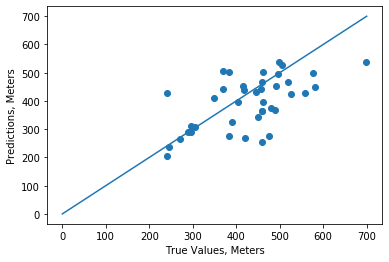

In [48]:
test_predictions = model.predict(normed_test_data).flatten()
plt.scatter(test_labels, test_predictions)
lims = [0,700]
plt.xlabel('True Values, Meters')
plt.ylabel('Predictions, Meters')
_ = plt.plot(lims, lims)
plt.show()

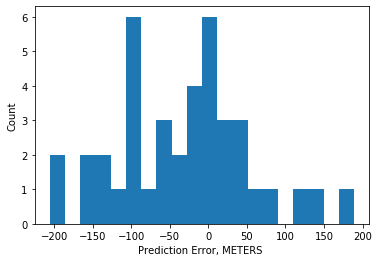

In [49]:
error = test_predictions - test_labels
plt.hist(error, bins = 20)
plt.xlabel("Prediction Error, METERS ")
_ = plt.ylabel("Count")

In [50]:
loss, mae, mse = model.evaluate(normed_train_data, train_labels, verbose=2)

60/60 - 0s - loss: 1171.2132 - mae: 13.7045 - mse: 1171.2133


In [51]:
rmsetraining = math.sqrt(mse)
print("Training set RMSE: {:5.2f} Meters".format(rmsetraining))

Training set RMSE: 34.22 Meters


In [52]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

40/40 - 0s - loss: 8639.3299 - mae: 71.7099 - mse: 8639.3301


In [53]:
rmsetest = math.sqrt(mse)
print("Testing set RMSE: {:5.2f} Meters".format(rmsetest))

Testing set RMSE: 92.95 Meters


# Conclusion

There is definitely a relationship between the outcome variable of distance in the walking test and the various factors in the data set and a model can be developed with accuracy of RMSE 34.22 meters on the training set with only basic data cleaning, this is by far the best RMSE value of any model. The overall dependent variable MWT1Best a max of 699. Unfortunately, after using 50% Drop out to combat overfitting the testing set RMSE is still at 92.95 meters and a Mean Absolute Error of 71.7099 Meters. The most important variables when analyzing the MWT1Best are diabetes and atrial fibrillation, this raises the question as to whether these variables have more effect on walking distance test than COPD. This also raises more questions about comorbidity.